# Mathematical and numerical methods in Physics (II)

吴俊——120072910027

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sy

## work 1

作业1：logistic模型可以描述生物种群的演化，它可以表示成一维非线性迭代方程$x_{n+1}=ax_n(1-x_n)$,$x_n$表示第n代种群的数目，其中0<x<1,参数a限制在(0,4).

取初值x0=0.1、0.6, 分别在a=0.5; a=2；a=3.1; a=3.2; a=3.6, 画出$x_n$随n的变化图n<200，并讨论不同a参数下，$x_n$长时间行为定性上的不同

In [2]:
def fx_n1(a,x_n):
    if ( x_n>0 and x_n<1 and a>0 and a<4):
        x_n1 = a*x_n*(1-x_n)
    return x_n1

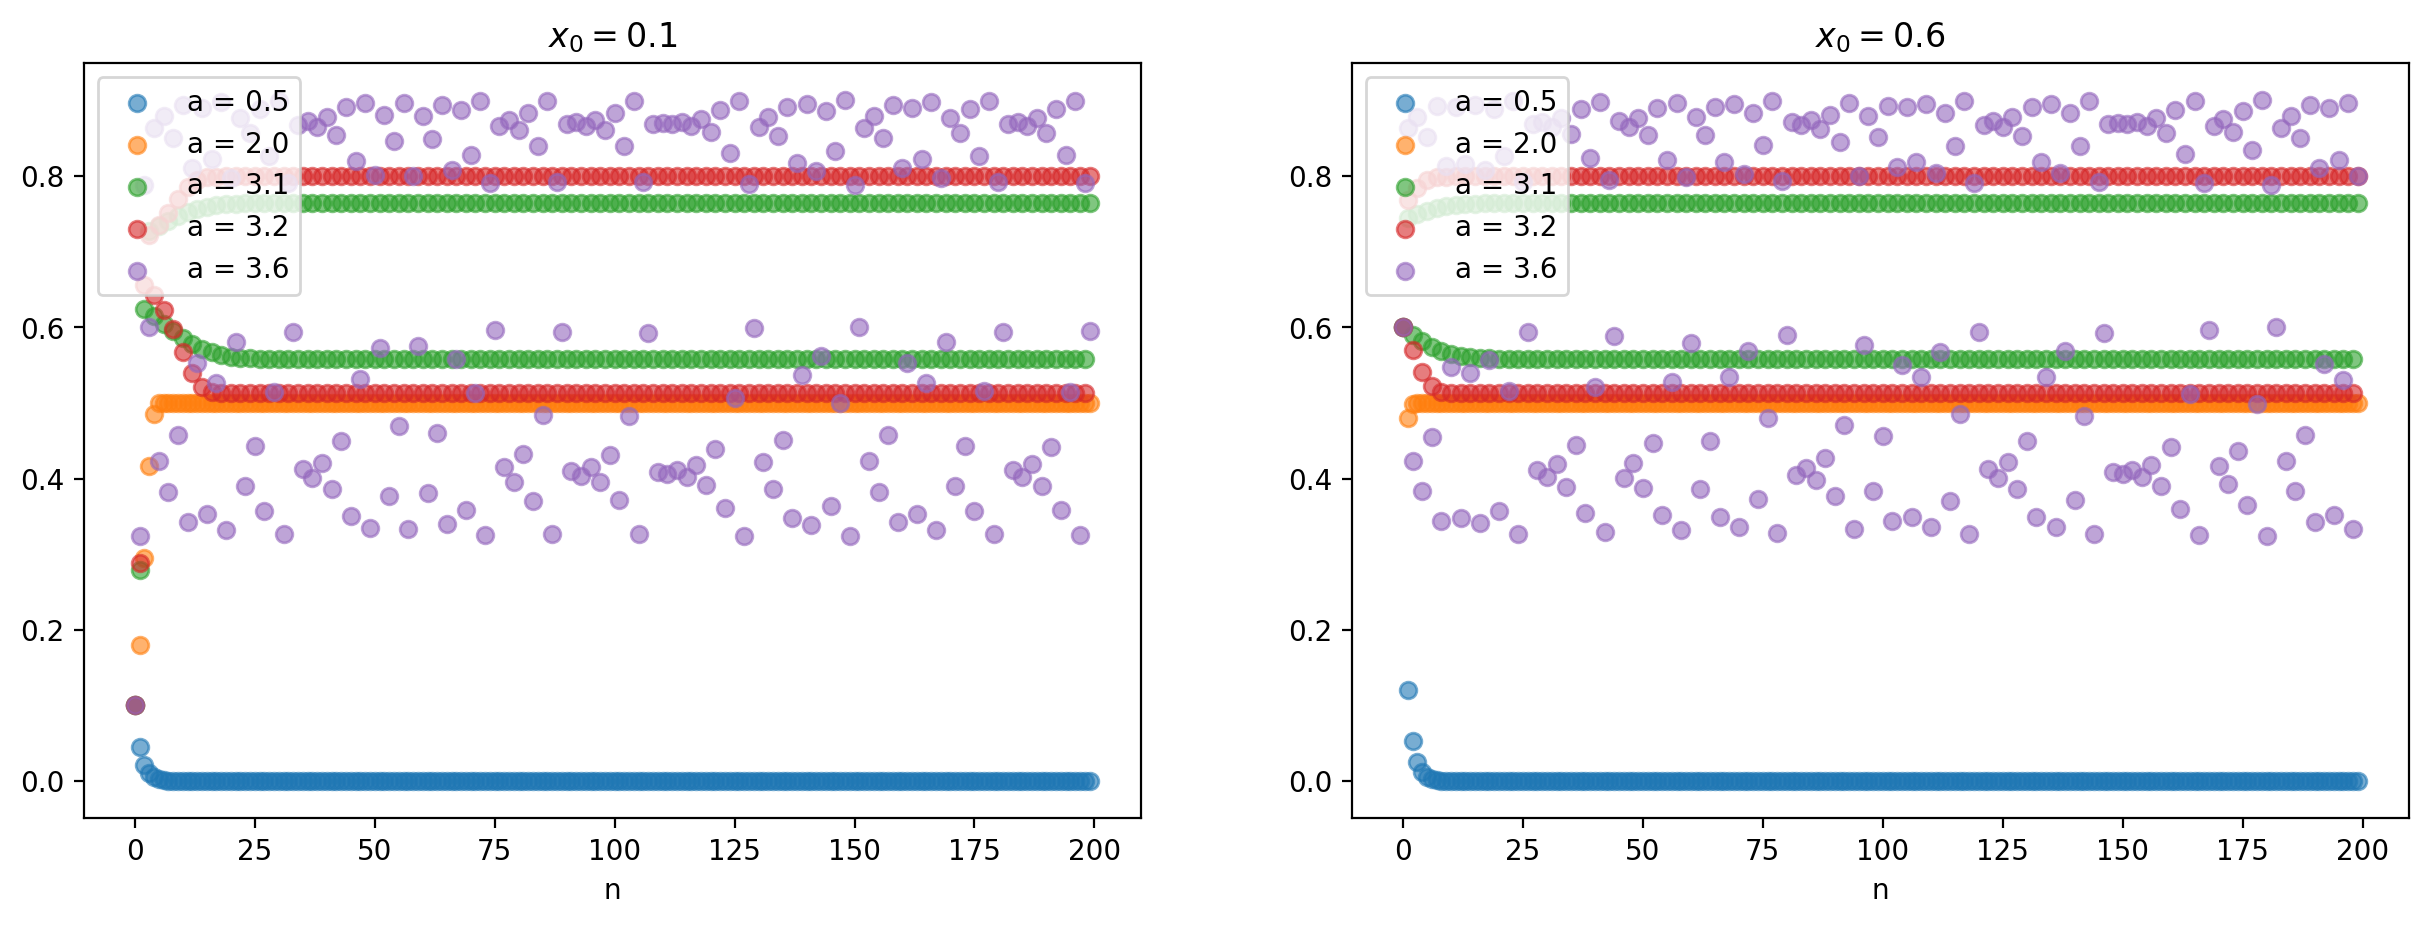

In [3]:
fig, axs = plt.subplots(1,2,figsize=(15,5),dpi=200)

x0s=[0.1, 0.6]
for seq in range(2):
    x0=x0s[seq]
    ax=axs[seq]
    ax.set_title(r'$x_0=%.1f$'%x0)

    alist = [0.5, 2, 3.1, 3.2, 3.6]
    nlist = np.arange(0,200)
    for a in alist:
        xn=[x0,]
        for i in nlist[:-1]:
            xn.append(fx_n1(a,xn[i]))
        ax.scatter(nlist, xn, label='a = %.1f'%a, alpha = 0.6)

    ax.set_xlabel('n')
    ax.legend(loc='upper left')

plt.show()

a=0.5,2 时，$x_n$ 趋向一个数，而a=3.1,3.2 时，$x_n$ 趋向两个数，即周期二，而a=3.6时，出现无规律的结果，即混沌。

## work 2

作业2：用牛顿迭代法求解下列非线性方程组的解

$\begin{equation}
f_1(x,y)=x-0.7\sin(x)-0.2\cos(y)=0 \\
f_2(x,y)=y-0.7\cos(x)+0.2\sin(y)=0 
\end{equation}$

$\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}^{-1} = 
\begin{pmatrix}
d & -b \\
-c & a \\
\end{pmatrix}/(ad-bc)$

In [4]:
def f1(xn,yn):
    f1 = xn - 0.7*np.sin(xn) - 0.2*np.cos(yn)
    return f1

def f2(xn,yn):
    f2 = yn - 0.7*np.cos(xn) + 0.2*np.sin(yn)
    return f2

def f1x(xn,yn):
    f1x = 1 - 0.7*np.cos(xn)
    return f1x

def f1y(xn,yn):
    f1y = 0.2*np.cos(yn)
    return f1y

def f2x(xn,yn):
    f2x = 0.7*np.sin(xn)
    return f2x

def f2y(xn,yn):
    f2y = 1 + 0.2*np.cos(yn)
    return f2y

def xn1(xn,yn):
    ditermin = f1x(xn,yn)*f2y(xn,yn) - f1y(xn,yn)*f2x(xn,yn)
    xn1 = xn - (f1(xn,yn)*f2y(xn,yn) - f2(xn,yn)*f1y(xn,yn))/(ditermin)
    return xn1

def yn1(xn,yn):
    ditermin = f1x(xn,yn)*f2y(xn,yn) - f1y(xn,yn)*f2x(xn,yn)
    yn1 = yn - (-f1(xn,yn)*f2x(xn,yn) + f2(xn,yn)*f1x(xn,yn))/(ditermin)
    return yn1

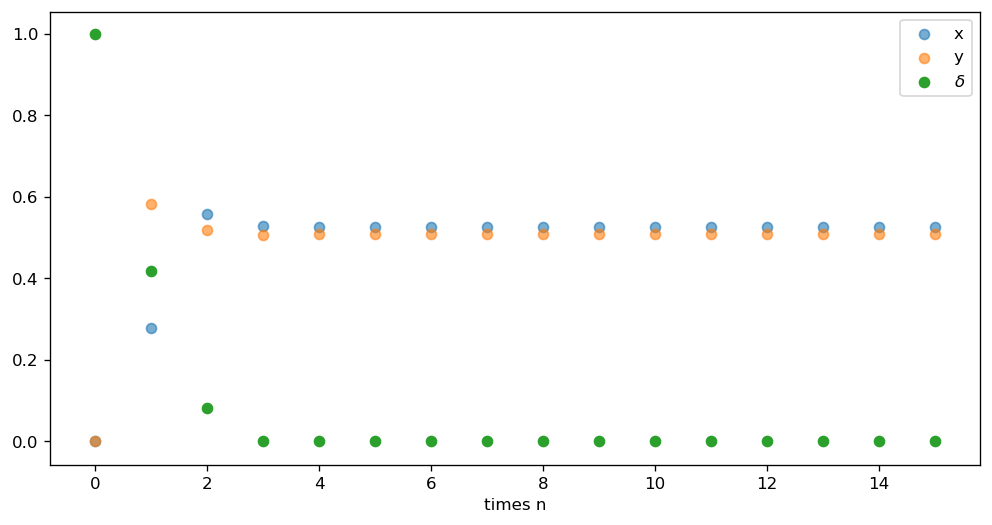

In [5]:
x=[0,]
y=[0,]

delta = [1,]
n=[0,]
# for i in range(100):
while( delta[-1] > 1e-30):
    xn = x[-1]
    yn = y[-1]
    x.append(xn1(xn,yn))
    y.append(yn1(xn,yn))
    delta.append( (x[-1]-x[-2])**2 + (y[-1]-y[-2])**2 )
    n.append(n[-1]+1)
#     print(delta[-1],end=' ')

fig, ax = plt.subplots(figsize=(10,5),dpi=120)

ax.scatter(n,x,label='x',alpha=0.6)
ax.scatter(n,y,label='y',alpha=0.6)
ax.scatter(n,delta,label=r'$\delta$')

ax.set_xlabel('times n')
ax.legend()

plt.show()

## work 3

作业3：用辛普森公式求下面积分（结果精确到$10^{-6}$）：

$I=\int_0^1 dx\frac{4}{1+x^2} = 4 \arctan x |_0^1 = \pi$

在积分区间$[a,a+2h]$，$f(x)\approx \alpha (x-a)^2 +\beta(x-a)+\gamma$

$\int_a^{a+2h} f(x)dx = \frac{h}{3}\left( f(a+2h) +4f(a+h) +f(a)\right)$

In [6]:
def fx(x):
    y=4/(1+x**2)
    return y

def sum_2h(a,h):
    sum = (fx(a+2*h)+4*fx(a+h)+fx(a))*h/3
    return sum

In [7]:
n = 100
h = 1/n/2
sum=0
a=0
for i in range(n):
    sum += sum_2h(a,h)
    a += 2*h

print(sum-np.pi)

-1.3322676295501878e-15


## work 5

作业5：对函数：$y = \frac{1}{1+x^2}$ 在区间 $[-1，1]$ ，以 $x_n=-1+0.1(n-1), n=1\dots 21$为插值点做三次样条插值

$\begin{equation}
S_n(x)=a_n+b_n (x-x_n)+c_n (x-x_n)^2+d_n (x-x_n)^3 \\
S_n^\prime(x)=b_n+2 c_n (x-x_n)+3 d_n (x-x_n)^2 \\
S_n^{\prime\prime}(x)=2c_n+6 d_n (x-x_n) \\
(1):a_n=y_n \\
(2):b_n= (y_{n+1}-y_n)/h-(c_{n+1}+2c_n)h/3\\
(3):c_n \rightarrow h^2 (c_{n+2}+4c_{n+1}+c_n)=3(y_{n+2}-2y_{n+1}+y_n)\\
(4):d_n=(c_{n+1}-c_n)/3h \\
c_0=c_{21}=0 \\
\end{equation}$

---

In [8]:
def yxn(xn):
    y=1/(1+xn**2)
#     y=np.cos(x**3)/(1+x**2)
    return y

In [9]:
# xn=np.linspace(-1, 1, 21)
h=0.1
xn=np.arange(-1,1+h,h)
yn=yxn(xn)
an=yxn(xn)[:-1]

In [10]:
mat=np.zeros((21,21))
for i in range(21):
    if (i==0 or i==20):
        mat[i,i] = 1
    else:
        for j in range(21):
            if (j==i-1 or j==i+1):
                mat[i,j] = h**2
            elif (j==i):
                mat[i,j] = 4*h**2

In [11]:
dy= yn[2:]+yn[:-2]-2*yn[1:-1]
ndy=np.insert(dy,(0,19),0)*3
cn = np.linalg.solve(mat,ndy)
dn=(cn[1:]-cn[:-1])/(3*h)
bn=(yn[1:]-yn[:-1])/h-h*(cn[1:]+2*cn[:-1])/3

In [12]:
def sn(a,b,c,d,xn,x):
    s=a+b*(x-xn)+c*(x-xn)**2+d*(x-xn)**3
    return s

In [13]:
fitx=np.array([])
fity=np.array([])

for i in range(20):
    x=np.arange(-1,-1+h,0.001)+i*h
    y=sn(an[i],bn[i],cn[i],dn[i],x[0],x)
    fitx=np.append(fitx,x)
    fity=np.append(fity,y)

In [14]:
s2=cn[:-1]+dn*h*3 - cn[1:] # 2nd 导数
(s2**2).mean()

4.164823504737398e-34

In [15]:
s1=(bn+2*cn[:-1]*h+3*((cn[1:]-cn[:-1])/(3*h))*h**2)[:-1] - bn[1:] #1st 导数
(s1**2).mean()

6.646384238080351e-31

In [16]:
s1=(bn+((cn[1:]+cn[:-1])*h))[:-1] - bn[1:] # 1st 导数
(s1**2).mean()

6.510150035698432e-31

In [17]:
yt=(an+bn*h+cn[:-1]*h**2+dn*h**3)[:-1] - an[1:] # y
(yt**2).mean()

3.8924057823405186e-33

---

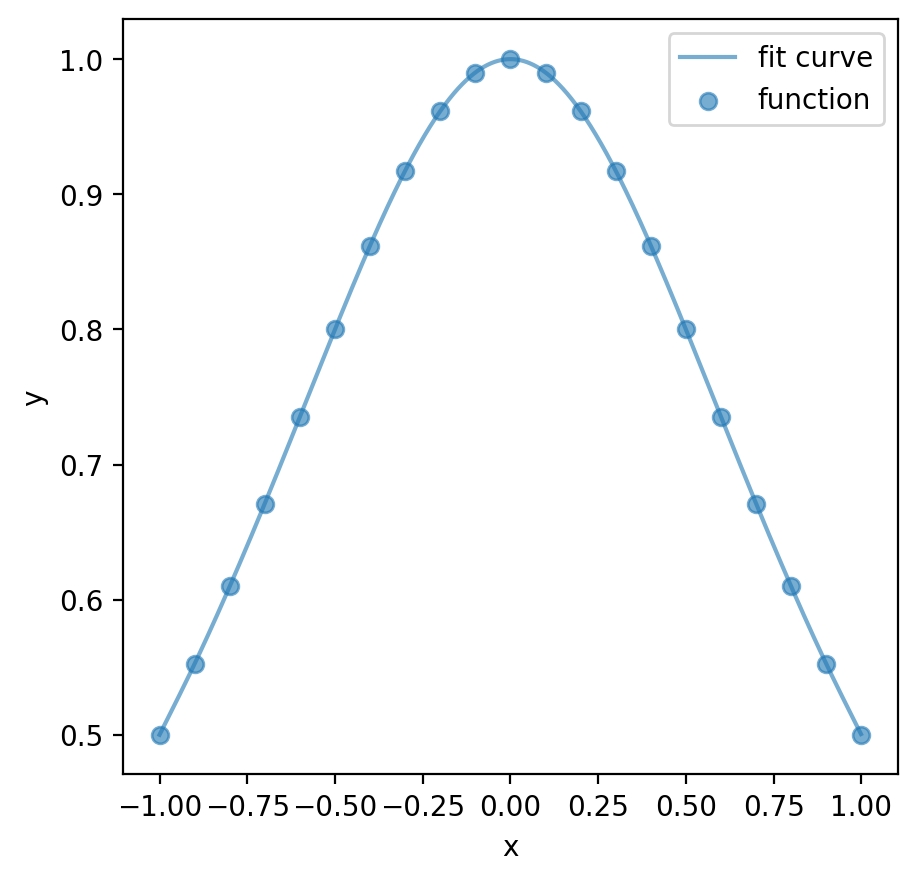

In [18]:
fig, ax=plt.subplots(figsize=(5,5),dpi=200)

ax.scatter(xn,yn,label='function',alpha=0.6)
ax.plot(fitx,fity,label='fit curve',alpha=0.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()

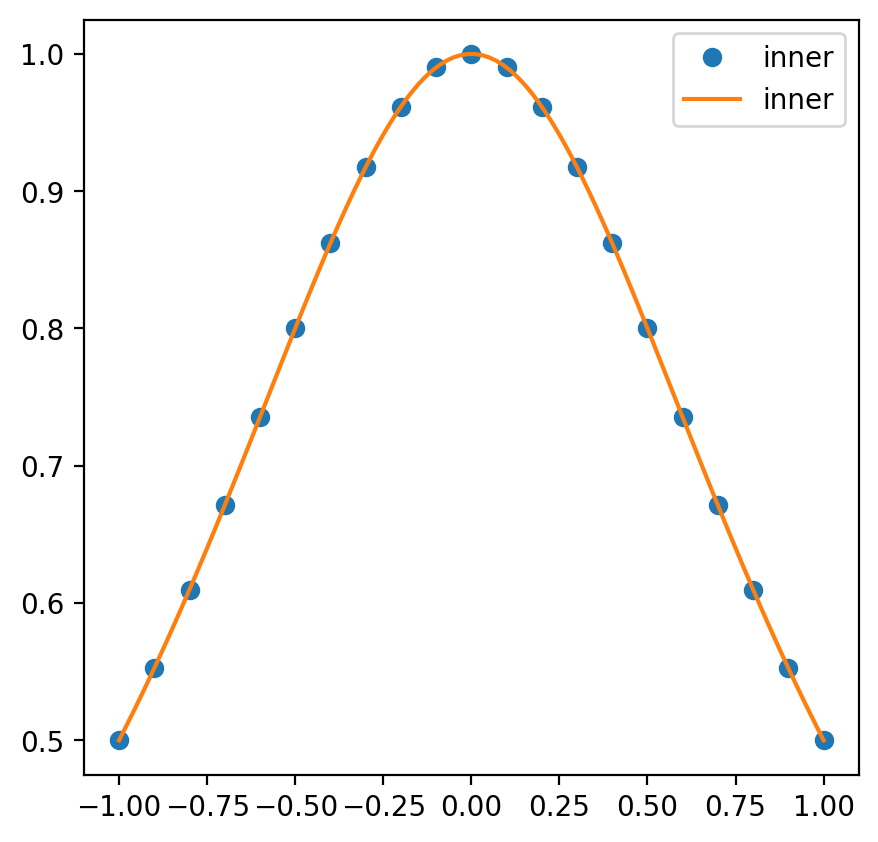

In [19]:
from scipy import interpolate

x=np.arange(-1,1.1,0.1)
y=1/(1+(x)**2)

tck = interpolate.splrep(x,y)
xx = np.linspace(min(x),max(x),100)
yy = interpolate.splev(xx,tck,der=0)

fig, ax=plt.subplots(figsize=(5,5),dpi=200)

ax.plot(x,y,'o',xx,yy,label='inner')

ax.legend()

plt.show()

## work 6

作业6：线性拟合下面一组数据

| | | | | | | | |
|-|-|-|-|-|-|-|-|
| x | 0.5 | 1.2 | 2.1 | 2.9 | 3.6 | 4.5 | 5.7 |
| y |2.81| 3.24| 3.80| 4.30| 4.73| 5.29| 6.03 |


In [20]:
xn=np.array([0.5,1.2,2.1,2.9,3.6,4.5,5.7])
yn=np.array([2.81,3.24,3.80,4.30,4.73,5.29,6.03])

In [21]:
a1=((xn*yn).mean()-xn.mean()*yn.mean())/((xn**2).mean()-(xn.mean())**2)
a0=yn.mean()-a1*xn.mean()
gamma=((xn*yn).mean()-xn.mean()*yn.mean())/np.sqrt(((xn**2).mean()-(xn.mean())**2)*((yn**2).mean()-(yn.mean())**2))

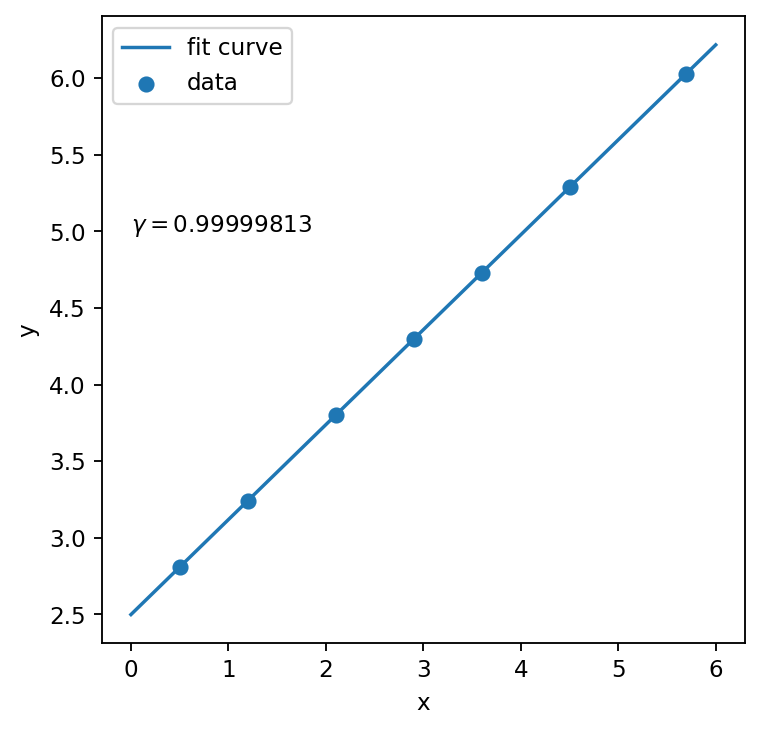

In [22]:
x=np.arange(0,6.5,0.5)
y=a1*x+a0

fig, ax=plt.subplots(figsize=(5,5),dpi=166)

ax.scatter(xn,yn,label='data')
ax.plot(x,y,label='fit curve')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.text(0,5,'$\gamma = %.8f$'%gamma)
ax.legend()

plt.show()